In [3]:
#Technical Indicators:
#Here i have considered 4 very popular technical Indicators used to predict stock movement .
#These  are i)Average Moving Average
#           ii)Relative Strength Index(RSI)
#           iii)Moving Average Convergence/Divergence(MACD)
#           iv)Fibonnaci Retracement

In [4]:
#this is a library with which help many technical indicators can be applied easily.
import talib

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas_datareader as pdr

In [6]:
#aaple stcok is taken for the application
aapl=pdr.get_data_yahoo('AAPL')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-27,113.239998,110.019997,112.230003,112.919998,84616100.0,104.350983
2015-08-28,113.309998,111.540001,112.169998,113.290001,53164400.0,104.692871
2015-08-31,114.529999,112.000000,112.029999,112.760002,56229300.0,104.203110
2015-09-01,111.879997,107.360001,110.150002,107.720001,76845900.0,99.545570
2015-09-02,112.339996,109.129997,110.230003,112.339996,61888800.0,103.814980


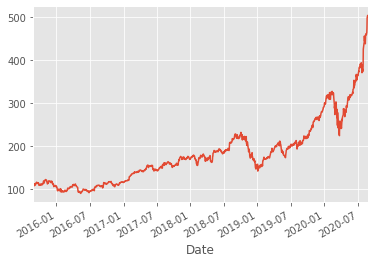

In [7]:
#the close price vs time graph
aapl['Close'].plot();

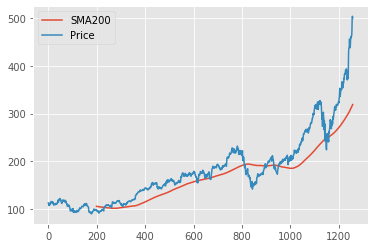

In [8]:
#1.simplemoving average(SMA).The moving average takes average of last 200 days price to predict the next day price.
#moving average work fine with strong trending condition but work poorly in choppy(ups and down)conditions
#two moving average can be applied one longer and another one shorter.When short one crosses the long one it indicate buy and otherwise sell signal.
sma200=talib.SMA(aapl['Close'].values,200)
plt.plot(sma200,label="SMA200")
plt.plot(aapl['Close'].values,label='Price')
plt.legend(loc='best')

In [46]:
#2.IMPLEMENTING BOLLINGER BAND FOR OUR DATA
?talib.BBANDS

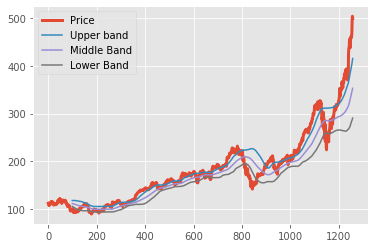

In [10]:
upperband,middleband,lowerband=talib.BBANDS(aapl['Close'].values,100,1,1)
plt.plot(aapl['Close'].values,lw=3,label='Price')
plt.plot(upperband,label='Upper band')
plt.plot(middleband,label='Middle Band')
plt.plot(lowerband,label='Lower Band')
plt.legend(loc='best');

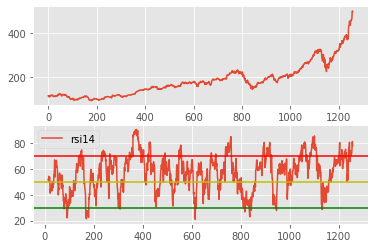

In [11]:
#RSI-Relatve Strength Index
#value above 70 indicate overbought and one look to sell it.
#value below 30 indicate oversold and one look to buy it.
rsi14=talib.RSI(aapl['Close'].values,14)
plt.figure()
plt.subplot(211)
plt.plot(aapl['Close'].values,label='Price')
plt.subplot(212)
plt.plot(rsi14,label='rsi14')
plt.axhline(y=50,color='y',linestyle='-')
plt.axhline(y=70,color='r',linestyle='-')
plt.axhline(y=30,color='g',linestyle='-')
plt.legend(loc='best')

In [13]:
#4.implementing fibonacci retracement
Price_Max=aapl['Close'].max()
Price_Min=aapl['Close'].min()
Diff = Price_Max-Price_Min

#calculating fibonacci levels
level1 = Price_Max - 0.236 * Diff
level2 = Price_Max - 0.382 * Diff
level3 = Price_Max - 0.618 * Diff

print ("Level", " ", "PRICE")

print ("0 ", "      " , Price_Max)
print ("0.236", "   " ,level1)
print ("0.382",  "   ",level2)
print ("0.618","   ",  level3)
print ("1 ",   "      ", Price_Min)

Level   PRICE
0         503.42999267578125
0.236     405.94075354003905
0.382     345.62961407470704
0.618     248.14037493896484
1         90.33999633789062


In [14]:
Price_Max,Price_Min

(503.42999267578125, 90.33999633789062)

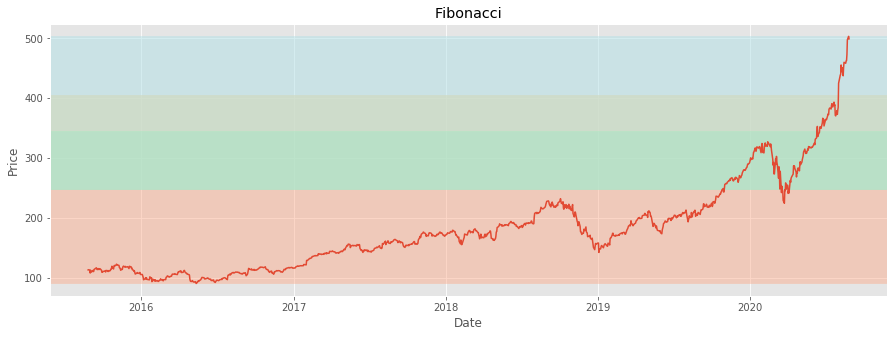

In [15]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(aapl.Close)

ax.axhspan(level1, Price_Min, alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
ax.axhspan(Price_Max, level3, alpha=0.5, color='powderblue')

plt.ylabel("Price")
plt.xlabel("Date")
plt.title('Fibonacci')
plt.show()

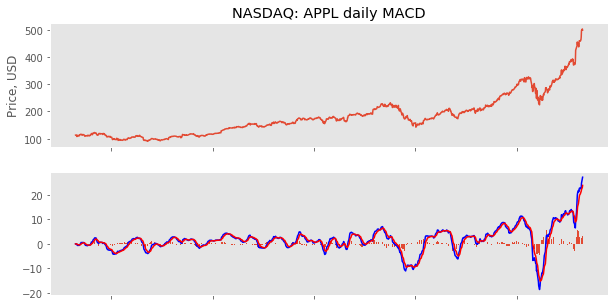

In [18]:
#TRADER BUY THE SECURITY WHEN MACD CROSS ABOVE THE SIGNAL LINE
#TRADER SELL THE SECURITY WHEN MACD CROSS BELOW THE SIGNAL LINE



# define MACD indicator calculation as function

# How to understand this indicator
# 1. Crossovers - As shown in the chart above, when the MACD falls below the signal line, it is a bearish signal,
# which indicates that it may be time to sell. Conversely, when the MACD rises above the signal line,
# the indicator gives a bullish signal, which suggests that the price of the asset is likely to experience upward
# momentum. Many traders wait for a confirmed cross above the signal line before entering into a position to avoid
# getting "faked out" or entering into a position too early, as shown by the first arrow.
#
# 2. Divergence - When the security price diverges from the MACD, it signals the end of the current trend.
# For example, a stock price that is rising and a MACD indicator that is falling could mean that the rally
# is about to end. Conversely, if a stock price is falling and the MACD is rising, it could mean that a
# bullish reversal could occur in the near-term. Traders often use divergence in conjunction with other technical
# indicators to find opportunities.
#
# 3. Dramatic Rise - When the MACD rises dramatically - that is, the shorter moving average pulls away from the
# longer-term moving average - it is a signal that the security is overbought and will soon return to normal levels.
# Traders will often combine this analysis with the Relative Strength Index (RSI) or other technical indicators
# to verify overbought or oversold conditions.
#
# Traders also watch for a move above or below the zero line because this signals the position of the short-term
# average relative to the long-term average. When the MACD is above zero, the short-term average is above the
# long-term average, which signals upward momentum. The opposite is true when the MACD is below zero.
# As you can see from the chart above, the zero line often acts as an area of support and resistance for the indicator.
#
# Read more: Moving Average Convergence Divergence (MACD) https://www.investopedia.com/terms/m/macd.asp#ixzz5VfwX1yUA

def calculate_macd(df, PRICE_NAME, period1, period2, period3): # default MACD period values are: period1 = 26, period2 = 12, period3 = 9.
    EMA_1 = df[PRICE_NAME].ewm(span=period1, adjust=False).mean()
    EMA_2 = df[PRICE_NAME].ewm(span=period2, adjust=False).mean()
    MACD_line = EMA_2 - EMA_1
    MACD_Signal_line = MACD_line.ewm(span=period3, adjust=False).mean()
    MACD_Histogram = MACD_line - MACD_Signal_line
    return MACD_line, MACD_Signal_line, MACD_Histogram



### 1. Data reading from file

# DATA_FILE_PATH = "apple.csv"

# df = pd.read_csv(DATA_FILE_PATH, sep=',')

#converting the index as columns
df=pdr.get_data_yahoo('AAPL')
df.reset_index(level=0, inplace=True)

#for the sake of convenience converting the data and close column name as followings
TIMESTAMP_NAME = "Date" # timestamp name from .csv
PRICE_NAME = "Close" # define price name that will be used from .csv



### 2. Show historic price data in the first subplot
plt.figure(figsize=(10,5)) # change default figure size
ax1 = plt.subplot(2, 1, 1)
plt.plot(df[TIMESTAMP_NAME], df[PRICE_NAME])
plt.title("NASDAQ: APPL daily MACD")
plt.ylabel("Price, USD")
plt.grid() # the grid is plotted in the background

frame1 = plt.gca() # hide x axis values
frame1.axes.xaxis.set_ticklabels([])



### 3. Calculate MACD indicator and add it to subplot
MACD_line, MACD_Signal_line, MACD_Histogram = calculate_macd(df, PRICE_NAME, 26, 12, 9) # calculating with the default MACD values

# add data to subplot
ax2 = plt.subplot(2, 1, 2, sharex = ax1)
plt.plot(df[TIMESTAMP_NAME], MACD_line, color = 'blue')
plt.plot(df[TIMESTAMP_NAME], MACD_Signal_line, color = 'red')
plt.bar(df[TIMESTAMP_NAME], MACD_Histogram)
plt.grid()

frame1 = plt.gca() # hide x axis values
frame1.axes.xaxis.set_ticklabels([])



### 4. Show subplot
plt.show()